**CLASIFICATION USING LOGISTIC REGRESSION**

In [56]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
#Importing classification dataset from preprocessing folder 
data = pd.read_excel('../preprocessing/classificationData.xlsx')

In [58]:
data.head()

,id number,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status,Recurrence
0,119513,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,...,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.000000e+00,0
1,8423,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.000000e+00,0
2,842517,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,...,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,4.440892e-16,0
3,843483,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,4.440892e-16,0
4,843584,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,4.440892e-16,1


This dataset doesn't have time as its variable because time cannot be known in advance. 

In [59]:
#checking missing values
data.isnull().sum()

id number                  0
Mean radius                0
Mean texture               0
Mean perimeter             0
Mean area                  0
Mean smothness             0
Mean compactness           0
Mean concavity             0
Mean concave points        0
Mean symmetry              0
Mean fractal dimension     0
STD radius                 0
STD texture                0
STD perimeter              0
STD area                   0
STD smothness              0
STD compactness            0
STD concavity              0
STD concave points         0
STD symmetry               0
STD fractal dimension      0
Worst radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smothness            0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
Tumour Size                0
Lymph node status          0
Recurrence                 0
dtype: int64

Data are already preprocessed, thus, no missing values. 

In [60]:
#LEt scale data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('Recurrence',axis=1))

scaled_features = scaler.transform(data.drop('Recurrence',axis=1))
df = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df.head()


,id number,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,Worst perimeter,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status
0,-0.649250,0.192688,1.241770,0.123934,0.122300,-0.623774,-0.784542,-0.676803,-0.480176,-0.228521,...,-0.022477,0.053105,-1.112648,-1.054732,-0.708404,-1.370815,-0.743009,-0.459226,1.113530,0.330401
1,-0.687799,0.183175,-2.774630,0.372418,0.088138,1.258416,2.711439,2.043606,1.785222,1.795777,...,1.535510,1.050496,0.832831,1.837343,1.589132,1.922113,1.823321,1.329259,0.078903,-0.222828
2,-0.398356,1.254939,-1.127953,1.061610,1.147186,-1.146560,-0.477137,-0.436726,-0.147247,1.481536,...,0.650684,0.930741,-1.144541,-0.123520,-0.550192,0.541923,1.467183,-0.007488,-0.179753,-0.591648
3,-0.398021,-1.900104,-0.442226,-1.747667,-1.662423,3.187841,2.838018,1.209726,0.545246,2.446183,...,-1.439240,-1.432374,3.001561,3.064487,1.444778,1.746815,4.540377,3.891002,-0.438410,-0.591648
4,-0.397986,0.912482,-1.850998,0.949089,0.930821,-0.190654,-0.197860,0.593194,0.518612,-0.433143,...,0.411261,0.290905,-0.297096,-0.978914,-0.211827,-0.361191,-1.160505,-0.665207,0.337560,-0.591648


In [61]:
#include target variable in scaled data frame
df['Recurrence'] = data['Recurrence']
df.head()

,id number,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status,Recurrence
0,-0.649250,0.192688,1.241770,0.123934,0.122300,-0.623774,-0.784542,-0.676803,-0.480176,-0.228521,...,0.053105,-1.112648,-1.054732,-0.708404,-1.370815,-0.743009,-0.459226,1.113530,0.330401,0
1,-0.687799,0.183175,-2.774630,0.372418,0.088138,1.258416,2.711439,2.043606,1.785222,1.795777,...,1.050496,0.832831,1.837343,1.589132,1.922113,1.823321,1.329259,0.078903,-0.222828,0
2,-0.398356,1.254939,-1.127953,1.061610,1.147186,-1.146560,-0.477137,-0.436726,-0.147247,1.481536,...,0.930741,-1.144541,-0.123520,-0.550192,0.541923,1.467183,-0.007488,-0.179753,-0.591648,0
3,-0.398021,-1.900104,-0.442226,-1.747667,-1.662423,3.187841,2.838018,1.209726,0.545246,2.446183,...,-1.432374,3.001561,3.064487,1.444778,1.746815,4.540377,3.891002,-0.438410,-0.591648,0
4,-0.397986,0.912482,-1.850998,0.949089,0.930821,-0.190654,-0.197860,0.593194,0.518612,-0.433143,...,0.290905,-0.297096,-0.978914,-0.211827,-0.361191,-1.160505,-0.665207,0.337560,-0.591648,1


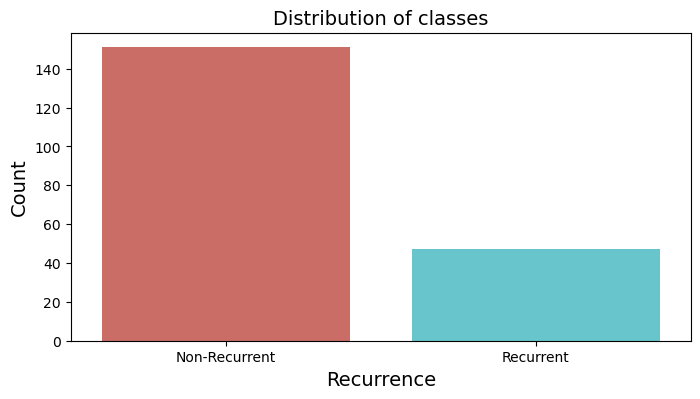

Number of cells labeled Reccurent:  47
Number of cells labeled Non-recurrent :  151

% of cells labeled Recurrent 23.74 %
% of cells labeled Non-Recurrent 76.26 %


In [62]:
# visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(x='Recurrence', data=df, palette='hls')
plt.xticks([0, 1], ['Non-Recurrent', 'Recurrent'])
plt.title('Distribution of classes', fontsize=14)
plt.xlabel('Recurrence', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# count number of obvs in each class
rec, nonrec = df['Recurrence'].value_counts()
print('Number of cells labeled Reccurent: ', nonrec)
print('Number of cells labeled Non-recurrent : ', rec)
print('')
print('% of cells labeled Recurrent', round(nonrec / len(df) * 100, 2), '%')
print('% of cells labeled Non-Recurrent', round(rec / len(df) * 100, 2), '%')

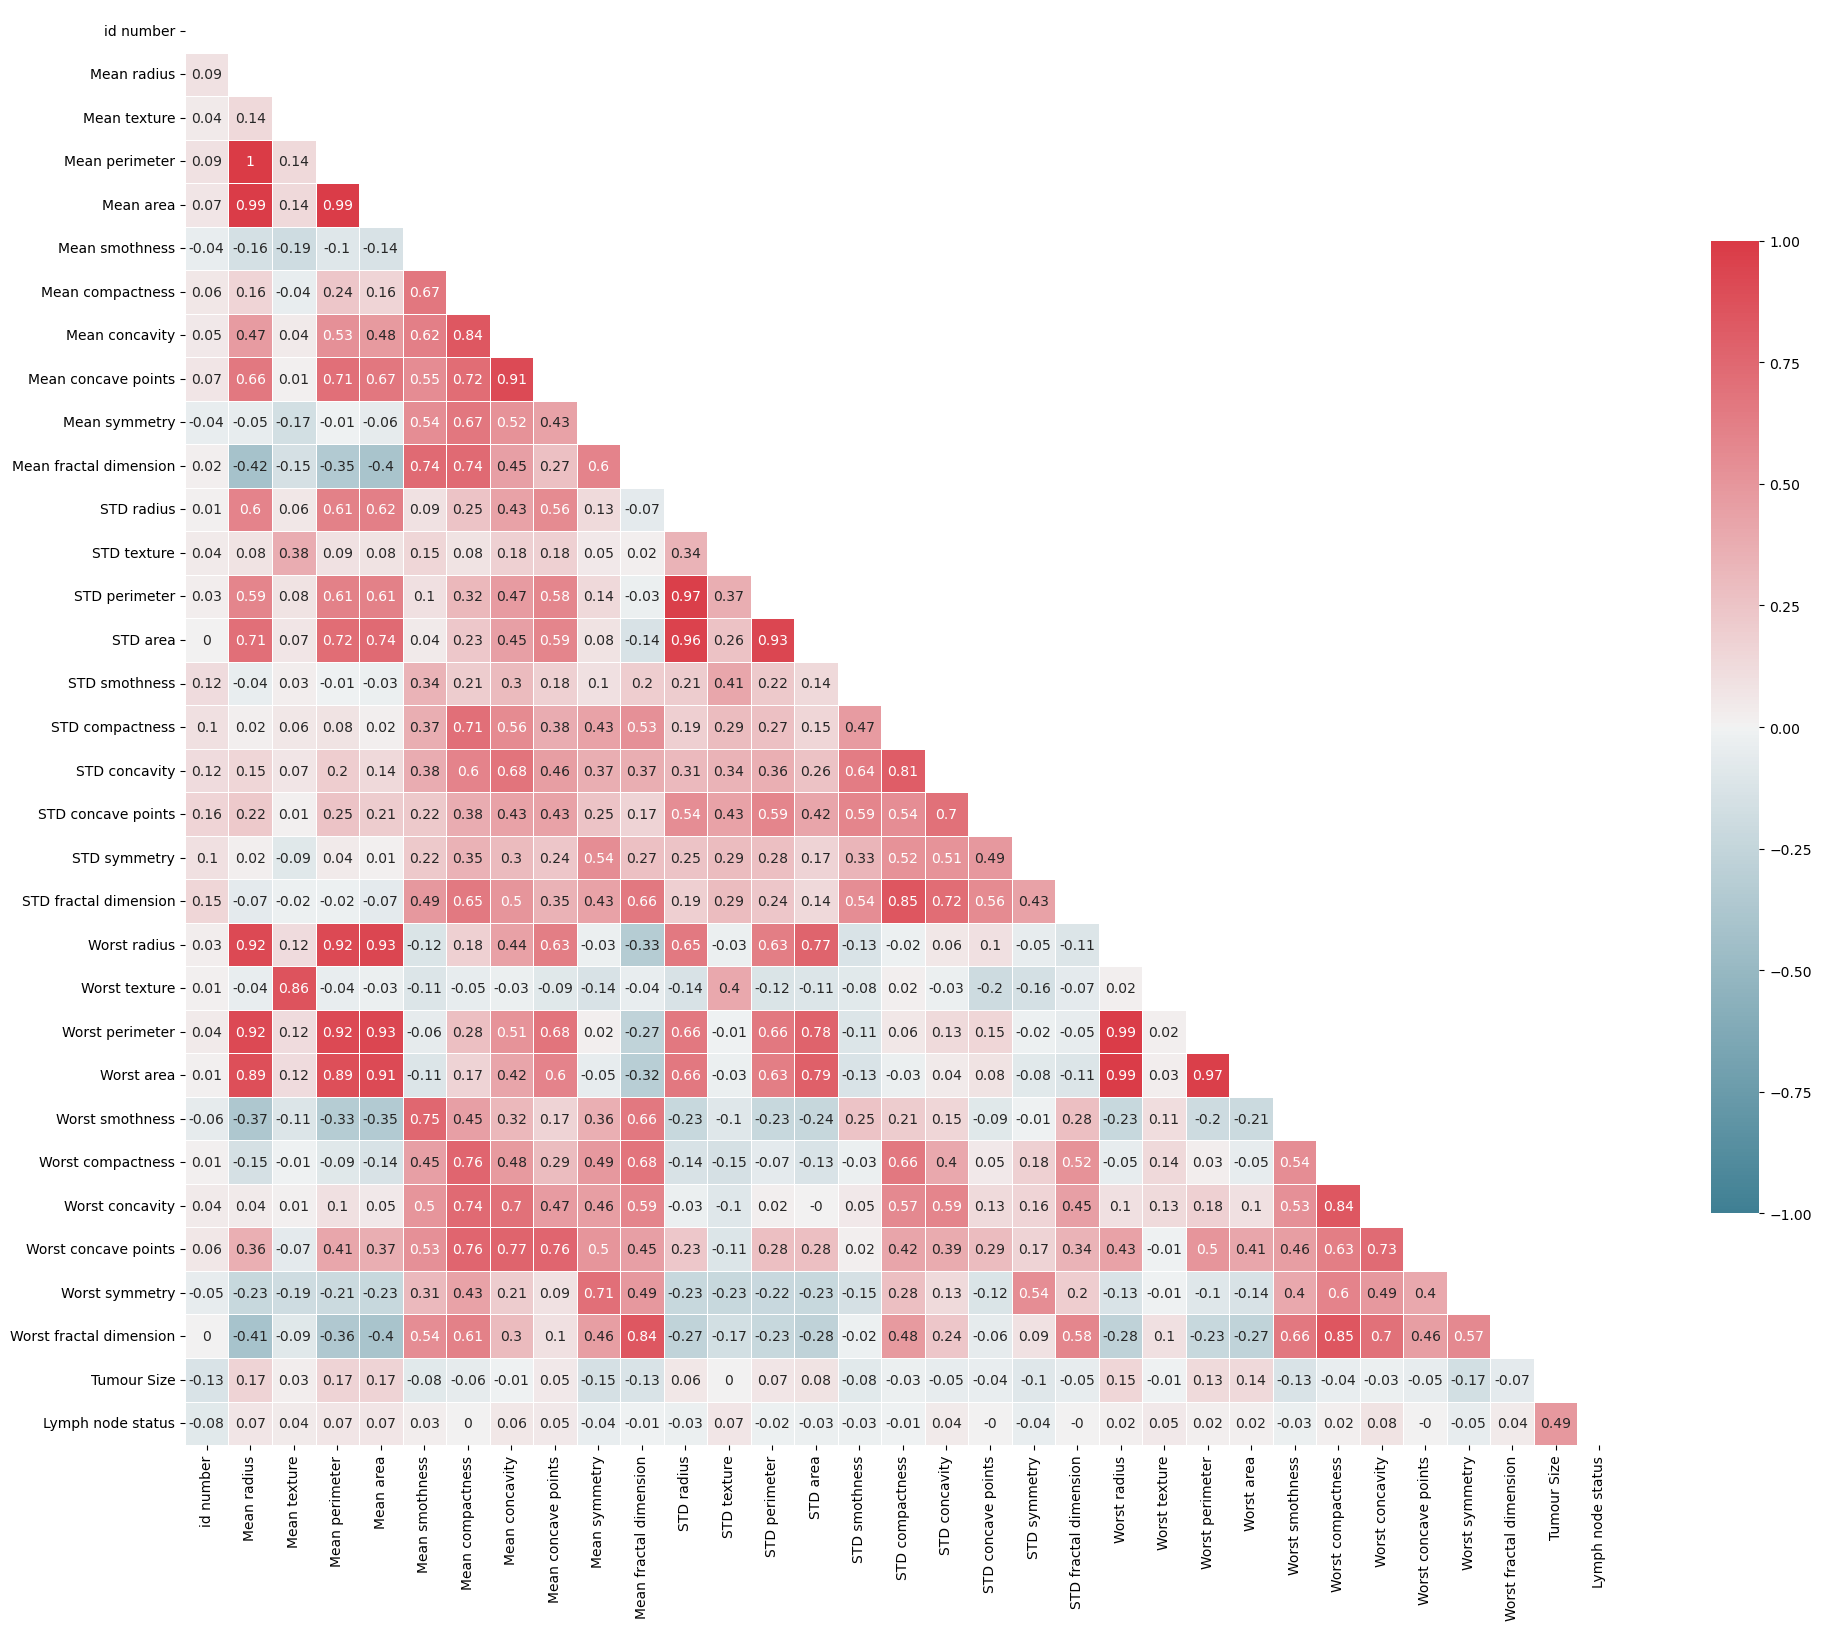

In [63]:
# Generate and visualize the correlation matrix excluding the target variable
corr = df.drop('Recurrence', axis=1).corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [64]:
#drop out id column
df.drop(['id number'], axis=1, inplace=True)
df.head()

,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,Mean fractal dimension,...,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status,Recurrence
0,0.192688,1.241770,0.123934,0.122300,-0.623774,-0.784542,-0.676803,-0.480176,-0.228521,0.086480,...,0.053105,-1.112648,-1.054732,-0.708404,-1.370815,-0.743009,-0.459226,1.113530,0.330401,0
1,0.183175,-2.774630,0.372418,0.088138,1.258416,2.711439,2.043606,1.785222,1.795777,2.216313,...,1.050496,0.832831,1.837343,1.589132,1.922113,1.823321,1.329259,0.078903,-0.222828,0
2,1.254939,-1.127953,1.061610,1.147186,-1.146560,-0.477137,-0.436726,-0.147247,1.481536,-0.360812,...,0.930741,-1.144541,-0.123520,-0.550192,0.541923,1.467183,-0.007488,-0.179753,-0.591648,0
3,-1.900104,-0.442226,-1.747667,-1.662423,3.187841,2.838018,1.209726,0.545246,2.446183,4.810056,...,-1.432374,3.001561,3.064487,1.444778,1.746815,4.540377,3.891002,-0.438410,-0.591648,0
4,0.912482,-1.850998,0.949089,0.930821,-0.190654,-0.197860,0.593194,0.518612,-0.433143,-0.536682,...,0.290905,-0.297096,-0.978914,-0.211827,-0.361191,-1.160505,-0.665207,0.337560,-0.591648,1


In [65]:
#We define X and y
X = df.drop('Recurrence',axis=1)
y = df['Recurrence']
#rename X and y as features and target
features = X
target = y
#print shape of features and target
print(features.shape)
print(target.shape)

(198, 32)
(198,)


In [66]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#print shape of train and test
print(X_train.shape)
print(X_test.shape)

(158, 32)
(40, 32)


In [67]:
#define logistic regression model 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='newton-cg', penalty='l2', C=0.001, max_iter=1000, random_state=42, class_weight='balanced')
logmodel.fit(X_train,y_train)
test_predictions = logmodel.predict(X_test)
train_predictions = logmodel.predict(X_train)

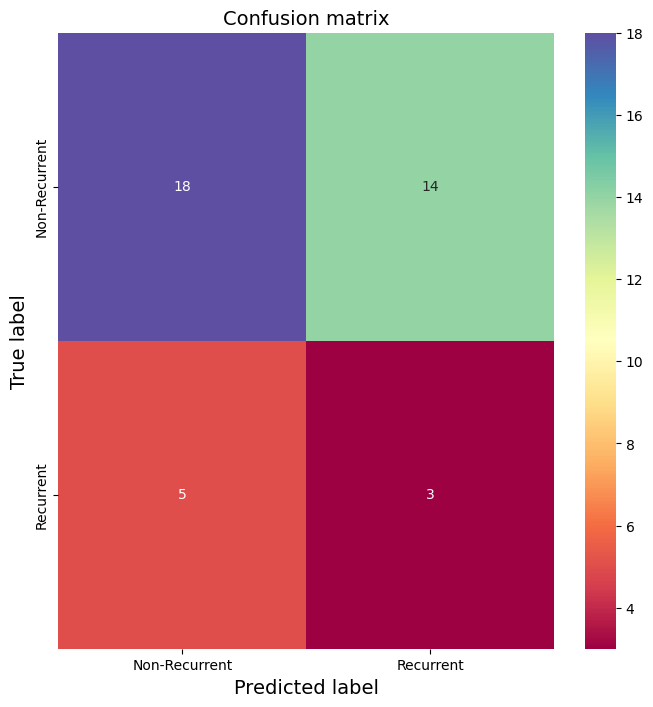

In [68]:
#plot confusion matrix for test data

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
plt.title('Confusion matrix', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
#label tick marks
tick_marks = np.arange(2) + 0.5
plt.xticks(tick_marks, ['Non-Recurrent', 'Recurrent'])
plt.yticks(tick_marks, ['Non-Recurrent', 'Recurrent'])

plt.show()


In [69]:
#find optimal value of hyperparameter C
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='newton-cg', penalty='l2', max_iter=100, random_state=42)

from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score


parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

cv = GridSearchCV(logmodel,parameters,cv=10, scoring=scorer)
cv_fit =cv.fit(X_train, y_train)

#print best estimator
best_clf = cv_fit.best_estimator_

In [70]:
best_score = fbeta_score(y_test, best_predictions, beta=0.6)

print("The best score is:" , best_score)


The best score is: 0.20523138832997986


In [71]:
#calculate accuracy, precision, recall, f1-score for test data and train data and store them in dataframe
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report


#test data
test_score = cv.score(X_test, y_test)

test_accuracy = accuracy_score(y_test, test_predictions)

test_precision = precision_score(y_test, test_predictions)

test_recall = recall_score(y_test, test_predictions)

test_f6 = fbeta_score(y_test, best_predictions, beta=0.6)

test_report = classification_report(y_test, test_predictions)


test_cm = pd.DataFrame(index=['Non-Recurrent', 'Recurrent'], columns=['Non-Recurrent', 'Recurrent'])

#train data
train_score = grid.score(X_train, y_train)

train_accuracy = accuracy_score(y_train, train_predictions)

train_precision = precision_score(y_train, train_predictions)

train_f6 = fbeta_score(y_train, train_predictions, beta=0.6)

train_recall = recall_score(y_train, train_predictions)

train_report = classification_report(y_train, train_predictions)


train_cm = pd.DataFrame( index=['Non-Recurrent', 'Recurrent'], columns=['Non-Recurrent', 'Recurrent'])


#store all metrics in dataframe
metrics = pd.DataFrame({ 
                        'F_6 Score': [test_f6, train_f6], 
                        'Accuracy': [test_accuracy, train_accuracy],
                        'Precision': [test_precision, train_precision],
                        'Recall': [test_recall, train_recall],
                        },
                          index=['Test', 'Train'])
metrics



,F_6 Score,Accuracy,Precision,Recall
Test,0.205231,0.525000,0.176471,0.375000
Train,0.441779,0.664557,0.393939,0.666667


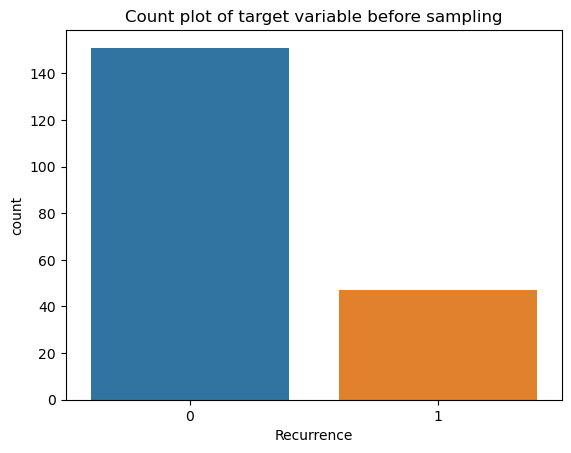

<Figure size 640x480 with 0 Axes>

In [80]:
#perform adasyn sampling
from imblearn.over_sampling import ADASYN

#save count plot of target variable before sampling
sns.countplot(x='Recurrence', data=df)
plt.title('Count plot of target variable before sampling')
plt.show()
plt.savefig('countplot_before_sampling.png')


In [78]:

#perform adasyn sampling
ada =  ADASYN(sampling_strategy=0.5, n_neighbors=10)
X_res, y_res = ada.fit_resample(X_train, y_train)

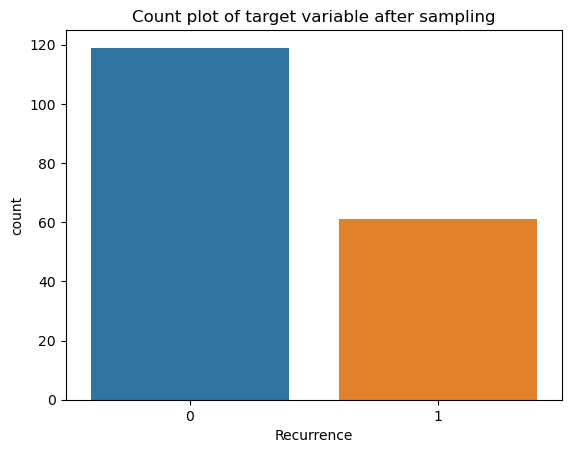

<Figure size 640x480 with 0 Axes>

In [79]:

#save count plot of target variable after sampling
sns.countplot(x=y_res)
plt.title('Count plot of target variable after sampling')
plt.show()
plt.savefig('countplot_after_sampling.png')